In [178]:
import pandas as pd
#import sqlite3
#pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv('train.csv', index_col = 'PassengerId')

SURVIVED_COL = 'Survived'
NAME_COL = 'Name'
SEX_COL = 'Sex'
CLASS_COL = 'Pclass'
AGE_COL = 'Age'
SIBSP_COL= 'SibSp'
PARCH_COL = 'Parch'
TICKET_COL ='Ticket'
PRICE_COL = 'Fare'
CABIN_COL = 'Cabin'
PORT_COL = 'Embarked'
STATUS_COL = 'Status'

column_names = titanic_data.columns
DATA_LEN = len(titanic_data)

# Context

In [124]:
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Columns meaning
* Name: Name of passenger
* Survival: is or not survived(0 = No, 1 = Yes)
* Pclass: Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex: Sex
* Age: Age in years
* Sibsp: count of siblings / spouses aboard the Titanic (brother, sister, stepbrother, stepsister; husband, wife (mistresses and fiancés were ignored))
* Parch: count of parents / children aboard the Titanic (Some children travelled only with a nanny, therefore parch=0 for them)
* Ticket: Ticket number
* Fare: Ticket Price
* Cabin: Cabin number
* Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [125]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<AxesSubplot:ylabel='Survived'>

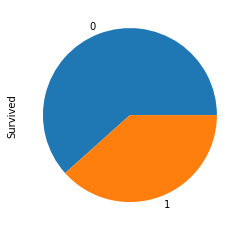

In [126]:
titanic_data[SURVIVED_COL].value_counts().plot.pie()

<AxesSubplot:ylabel='Sex'>

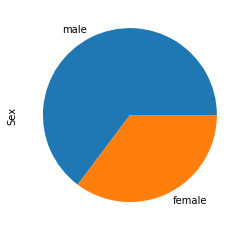

In [127]:
titanic_data[SEX_COL].value_counts().plot.pie()

Text(0.5, 1.0, 'Age')

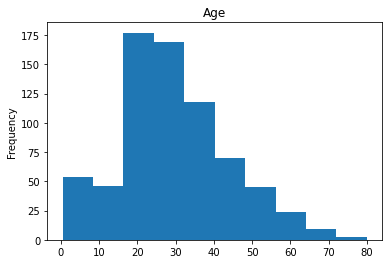

In [137]:
titanic_data[AGE_COL].plot(kind='hist', xlabel='Age').set_title('Age')

Text(0.5, 1.0, 'Ticket price')

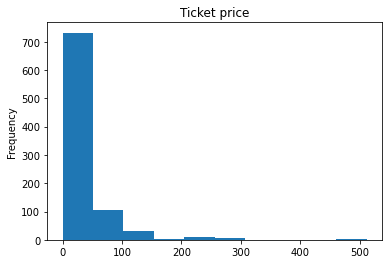

In [138]:
titanic_data[PRICE_COL].plot(kind='hist').set_title('Ticket price')

<AxesSubplot:ylabel='Embarked'>

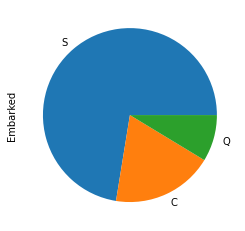

In [139]:
titanic_data[PORT_COL].value_counts().plot.pie()

<AxesSubplot:ylabel='Pclass'>

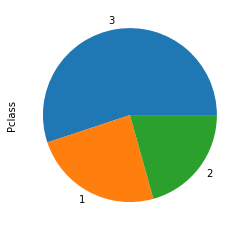

In [140]:
titanic_data[CLASS_COL].value_counts().plot.pie()

Text(0.5, 1.0, 'Siblings/Sproud abroad')

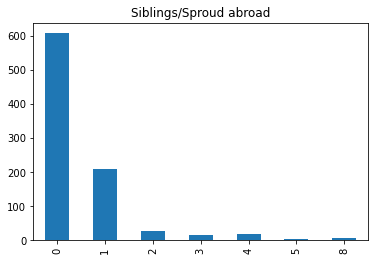

In [151]:
titanic_data[SIBSP_COL].value_counts().sort_index().plot(kind='bar').set_title('Siblings/Sproud abroad')

Text(0.5, 1.0, 'Parents/Childs abroad')

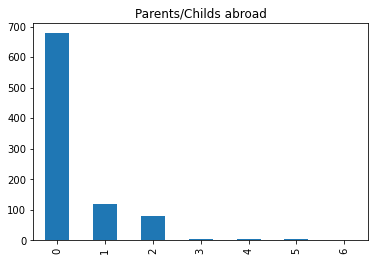

In [152]:
titanic_data[PARCH_COL].value_counts().sort_index().plot(kind='bar').set_title('Parents/Childs abroad')

Passanger names include the person status, that could be usefull for data analysis, what can't we say about full name:

In [177]:
names_seria = titanic_data[NAME_COL]
for i in range(len(names_seria)):
    names_seria.iloc[i] = names_seria.iloc[i].split()[1]
titanic_data['Status'] = names_seria
titanic_data.drop(NAME_COL)
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
PassengerId,,,,,,,,,,,,
1,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,Mrs.,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,Mr.,male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Rev.,male,27.0,0,0,211536,13.0000,NaN,S,Rev.
888,1,1,Miss.,female,19.0,0,0,112053,30.0000,B42,S,Miss.
889,0,3,Miss.,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.


# Data quality assessment

In [116]:
print('Columns with Nans:')
for c in range(len(column_names)):
    if titanic_data[column_names[c]].hasnans:
        print (column_names[c])
        print (str(len(titanic_data[titanic_data[column_names[c]].isna()]) / DATA_LEN *100) + '% of Nans')

Columns with Nans:
Age
19.865319865319865% of Nans
Cabin
77.10437710437711% of Nans
Embarked
0.22446689113355783% of Nans


Age gaps need to be replaced with the mean of person status

In [105]:
#titanic_data[AGE_COL] = titanic_data[AGE_COL].fillna(-1)


Nans replaced


In [64]:
titanic_data[CABIN_COL] = titanic_data[CABIN_COL].fillna('NO INFO')
titanic_data[PORT_COL] = titanic_data[PORT_COL].fillna('NO INFO')
print('Nans replaced')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NO INFO
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NO INFO


In [74]:
titanic_data[titanic_data[NAME_COL].duplicated()]) 

No duplicated found

# Data exploration

In [ ]:
sns.heatmap(titanic_data.corr())

In [ ]:
titanic_data[SEX_COL].value_counts().plot.pie()
titanic_data[AGE_COL].dropna().astype(int).plot(kind='hist')

# Summary